In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Global fossil fuel consumption

In [2]:
data = pd.read_csv("../data/Fossil_Fuels/global-fossil-fuel-consumption.csv")
data.head()

,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,1800,97,0,0
1,1810,128,0,0
2,1820,153,0,0
3,1830,264,0,0
4,1840,356,0,0


### Importing Fossil fuel consumption by region

In [3]:
df_fosill_region = pd.read_csv("../data/Fossil_Fuels/fossil-fuel-primary-energy.csv")
df_fosill_region.head()

,Entity,Code,Year,Fossil Fuels (TWh)
0,Africa,NaN,1965,658.940796
1,Africa,NaN,1966,690.502006
2,Africa,NaN,1967,694.670848
3,Africa,NaN,1968,727.596509
4,Africa,NaN,1969,737.671476


### Importing Coal consumption by region

In [4]:
df_coal_region = pd.read_csv("../data/Fossil_Fuels/coal-consumption-by-region.csv")
df_coal_region = df_coal_region[df_coal_region['Year']>=1990]
df_coal_region.head()

,Entity,Code,Year,Coal Consumption - EJ
25,Africa,NaN,1990,3.160116
26,Africa,NaN,1991,3.071500
27,Africa,NaN,1992,3.089883
28,Africa,NaN,1993,3.137815
29,Africa,NaN,1994,3.219007


In [5]:
#converting EJ to TWH
df_coal_region['Coal Consumption - EJ']=df_coal_region['Coal Consumption - EJ'].apply(lambda x: x*277.77)
df_coal_region.rename(columns={'Coal Consumption - EJ': 'Coal Consumption(TWH)'},inplace=True)
df_coal_region.head()

,Entity,Code,Year,Coal Consumption(TWH)
25,Africa,NaN,1990,877.785283
26,Africa,NaN,1991,853.170679
27,Africa,NaN,1992,858.276716
28,Africa,NaN,1993,871.590801
29,Africa,NaN,1994,894.143694


### Importing Gas Consumption by region

In [6]:
df_gas_region = pd.read_csv("../data/Fossil_Fuels/natural-gas-consumption-by-region.csv")
df_gas_region = df_gas_region[df_gas_region['Year']>=1990]
df_gas_region.head()

,Entity,Code,Year,Gas Consumption - EJ
25,Africa,NaN,1990,1.435123
26,Africa,NaN,1991,1.445888
27,Africa,NaN,1992,1.516573
28,Africa,NaN,1993,1.485518
29,Africa,NaN,1994,1.554581


In [7]:
#converting EJ to TWH
df_gas_region['Gas Consumption - EJ']=df_gas_region['Gas Consumption - EJ'].apply(lambda x: x*277.77)
df_gas_region.rename(columns={'Gas Consumption - EJ': 'Gas Consumption(TWH)'},inplace=True)
df_gas_region.head()

,Entity,Code,Year,Gas Consumption(TWH)
25,Africa,NaN,1990,398.634222
26,Africa,NaN,1991,401.624347
27,Africa,NaN,1992,421.258462
28,Africa,NaN,1993,412.632423
29,Africa,NaN,1994,431.815861


### Importing Oil Consumption by region

In [8]:
df_oil_region = pd.read_csv("../data/Fossil_Fuels/oil-consumption-by-region-terawatt-hours-twh.csv")
df_oil_region = df_oil_region[df_oil_region['Year']>=1990]
df_oil_region.head()

,Entity,Code,Year,Oil Consumption - EJ
25,Africa,NaN,1990,4.126926
26,Africa,NaN,1991,4.155497
27,Africa,NaN,1992,4.251372
28,Africa,NaN,1993,4.300878
29,Africa,NaN,1994,4.400075


In [9]:
#converting EJ to TWH
df_oil_region['Oil Consumption - EJ']=df_oil_region['Oil Consumption - EJ'].apply(lambda x: x*277.77)
df_oil_region.rename(columns={'Oil Consumption - EJ': 'Oil Consumption - TWH'},inplace=True)
df_oil_region.head()

,Entity,Code,Year,Oil Consumption - TWH
25,Africa,NaN,1990,1146.336255
26,Africa,NaN,1991,1154.272502
27,Africa,NaN,1992,1180.903631
28,Africa,NaN,1993,1194.654911
29,Africa,NaN,1994,1222.208751


In [10]:
data['Year']= data['Year'].astype("int")

In [11]:
data=data.rename(columns = {'Coal (TWh; direct energy)': 'Coal(Terawatt-Hours)','Oil (TWh; direct energy)': 'Oil(Terawatt-Hours)', 
                       'Gas (TWh; direct energy)':'Gas(Terawatt-Hours)'})

## Using global fossil fuels consumption from 1990 only

In [12]:
data = data[data.Year>=1990]
data.head()

,Year,Coal(Terawatt-Hours),Oil(Terawatt-Hours),Gas(Terawatt-Hours)
42,1990,25895,37691,19483
43,1991,25643,37691,19975
44,1992,25550,38344,20067
45,1993,25675,38099,20269
46,1994,25774,38935,20394


In [13]:
data.isna().sum()

Year                    0
Coal(Terawatt-Hours)    0
Oil(Terawatt-Hours)     0
Gas(Terawatt-Hours)     0
dtype: int64

We see that fossil fuel consumption is from three main sources namely <b>Coal, Oil and Gas</b>. Let us plot yearly comparison for all these three soucres

### Global Coal Consumption Yearly

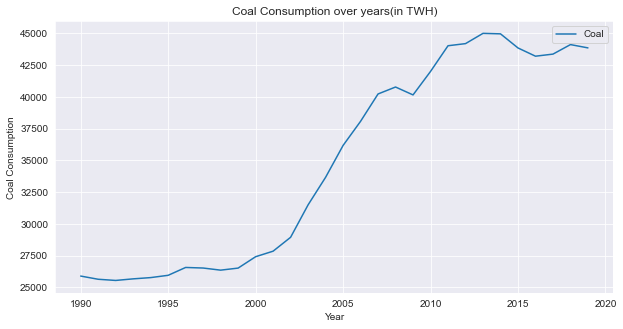

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Coal(Terawatt-Hours)'],label='Coal')
plt.ylabel("Coal Consumption")
plt.xlabel("Year")
plt.title("Coal Consumption over years(in TWH)")
plt.legend()
plt.show()

In [15]:
#Coal Consumption Yearly for four countries
USA = df_coal_region[df_coal_region['Entity']=='United States']
UK  = df_coal_region[df_coal_region['Entity']=='United Kingdom']
Australia = df_coal_region[df_coal_region['Entity']=='Australia']
Russia = df_coal_region[df_coal_region['Entity']=='Russia']

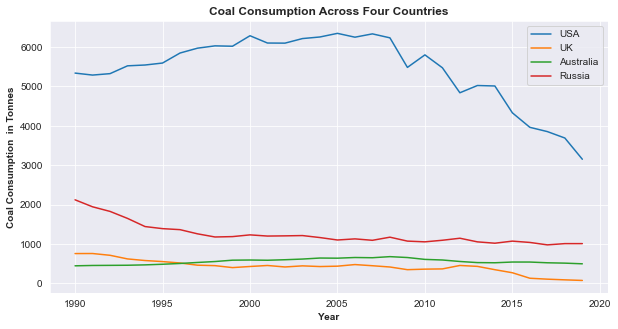

In [16]:
plt.figure(figsize=(10,5))
USAplot = plt.plot(USA['Year'],USA['Coal Consumption(TWH)'] ,label = 'USA')
UKplot = plt.plot(UK['Year'],UK['Coal Consumption(TWH)'], label = 'UK' )
Ausplot = plt.plot(Australia['Year'],Australia['Coal Consumption(TWH)'], label = 'Australia')
RusPlot = plt.plot(Russia['Year'],Russia['Coal Consumption(TWH)'], label = 'Russia')
plt.xlabel("Year", fontweight='bold')
plt.title("Coal Consumption Across Four Countries",fontweight='bold')
plt.ylabel('Coal Consumption  in Tonnes',fontweight='bold')
plt.legend()

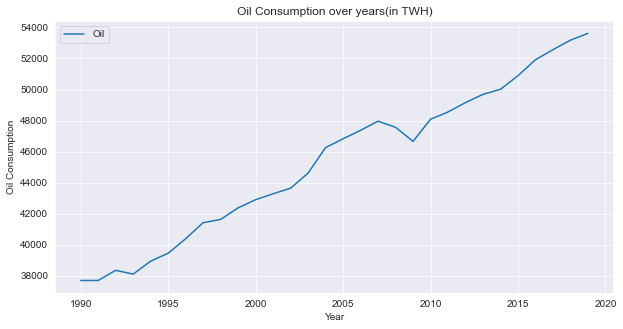

In [17]:
#plotting oil consumption vs year
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Oil(Terawatt-Hours)'],label='Oil')
plt.ylabel("Oil Consumption")
plt.xlabel("Year")
plt.title("Oil Consumption over years(in TWH)")
plt.legend()
plt.show()

In [18]:
#Oil Consumption Yearly for four countries
USA = df_oil_region[df_oil_region['Entity']=='United States']
UK  = df_oil_region[df_oil_region['Entity']=='United Kingdom']
Australia = df_oil_region[df_oil_region['Entity']=='Australia']
Russia = df_oil_region[df_oil_region['Entity']=='Russia']

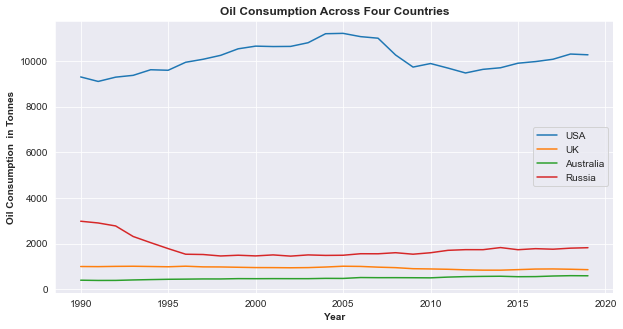

In [19]:
plt.figure(figsize=(10,5))
USAplot = plt.plot(USA['Year'],USA['Oil Consumption - TWH'] ,label = 'USA')
UKplot = plt.plot(UK['Year'],UK['Oil Consumption - TWH'], label = 'UK' )
Ausplot = plt.plot(Australia['Year'],Australia['Oil Consumption - TWH'], label = 'Australia')
RusPlot = plt.plot(Russia['Year'],Russia['Oil Consumption - TWH'], label = 'Russia')
plt.xlabel("Year", fontweight='bold')
plt.title("Oil Consumption Across Four Countries",fontweight='bold')
plt.ylabel('Oil Consumption  in Tonnes',fontweight='bold')
plt.legend()

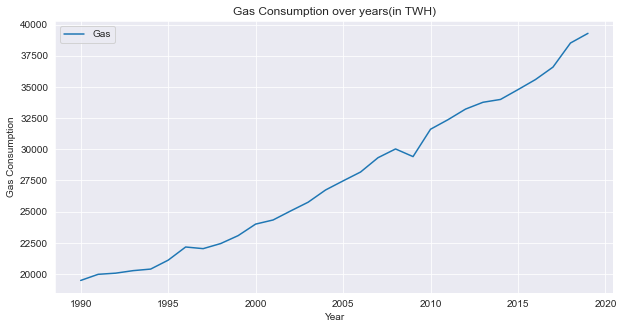

In [20]:
#plotting Gas consumption vs year
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Gas(Terawatt-Hours)'],label='Gas')
plt.ylabel("Gas Consumption")
plt.xlabel("Year")
plt.title("Gas Consumption over years(in TWH)")
plt.legend()
plt.show()

In [21]:
#Oil Consumption Yearly for four countries
USA = df_gas_region[df_gas_region['Entity']=='United States']
UK  = df_gas_region[df_gas_region['Entity']=='United Kingdom']
Australia = df_gas_region[df_gas_region['Entity']=='Australia']
Russia = df_gas_region[df_gas_region['Entity']=='Russia']

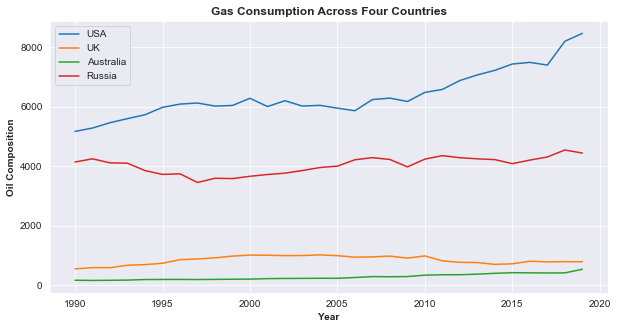

In [22]:
plt.figure(figsize=(10,5))
USAplot = plt.plot(USA['Year'],USA['Gas Consumption(TWH)'] ,label = 'USA')
UKplot = plt.plot(UK['Year'],UK['Gas Consumption(TWH)'], label = 'UK' )
Ausplot = plt.plot(Australia['Year'],Australia['Gas Consumption(TWH)'], label = 'Australia')
RusPlot = plt.plot(Russia['Year'],Russia['Gas Consumption(TWH)'], label = 'Russia')
plt.xlabel("Year", fontweight='bold')
plt.title("Gas Consumption Across Four Countries",fontweight='bold')
plt.ylabel('Oil Composition',fontweight='bold')
plt.legend()

### Exporing the Fossil Fuel consumption per Capita

Fossil fuel consumption per capita is measured as the average consumption of energy from coal, oil and gas per person.

In [23]:
df= pd.read_csv("../data/Fossil_Fuels/fossil-fuels-per-capita.csv")
df=df[df['Year']>=1990]
df.head()

,Entity,Code,Year,Fossil fuels per capita (kWh)
25,Africa,NaN,1990,3843.619379
26,Africa,NaN,1991,3721.571392
27,Africa,NaN,1992,3702.731736
28,Africa,NaN,1993,3635.521718
29,Africa,NaN,1994,3643.233885


In [24]:
df=df.rename(columns = {'Fossil fuels per capita (kWh)': 'Fuel(inKWH)'})
#data=data.rename(columns = {'Coal (TWh; direct energy)': 'Coal(Terawatt-Hours)'})

In [25]:
df.head()

,Entity,Code,Year,Fuel(inKWH)
25,Africa,NaN,1990,3843.619379
26,Africa,NaN,1991,3721.571392
27,Africa,NaN,1992,3702.731736
28,Africa,NaN,1993,3635.521718
29,Africa,NaN,1994,3643.233885


In [26]:
#getting per capita fuel consumption for world across years 1965-2019
df_world= df[df['Entity']=='World']
df_world.head()

,Entity,Code,Year,Fuel(inKWH)
4254,World,OWID_WRL,1990,15593.52682
4255,World,OWID_WRL,1991,15387.07397
4256,World,OWID_WRL,1992,15268.65955
4257,World,OWID_WRL,1993,15057.24636
4258,World,OWID_WRL,1994,15027.30240


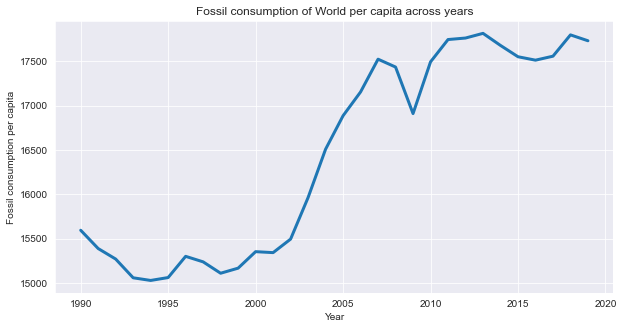

In [27]:
plt.figure(figsize=(10,5))
plt.plot(df_world['Year'],df_world['Fuel(inKWH)'],linewidth=3,)
plt.ylabel("Fossil consumption per capita")
plt.xlabel("Year")
plt.title("Fossil consumption of World per capita across years")
plt.show()

In [28]:
#getting the total fossil fuel consumption per capita by each country starting from 1970
df_per_capita = df.groupby(['Entity'])['Fuel(inKWH)'].sum().sort_values(ascending=False).reset_index()

In [29]:
df_per_capita.head(10)

,Entity,Fuel(inKWH)
0,Qatar,6.873530e+06
1,United Arab Emirates,4.778367e+06
2,Singapore,3.945996e+06
3,Trinidad and Tobago,3.661382e+06
4,Kuwait,3.254508e+06
5,Luxembourg,2.692841e+06
6,North America,2.402178e+06
7,Saudi Arabia,2.262853e+06
8,United States,2.261367e+06
9,Canada,2.158699e+06


In [30]:
#df_per_capita['Fuel(inKWH)'].astype('float64')

In [31]:
#converting kwh to mwh for clear representation
df_per_capita['Fuel(inMWH)']=df_per_capita['Fuel(inKWH)'].apply(lambda x: x*0.001)
#df_per_capita.rename(columns={'Fossil fuels per capita (kWh)':'Fossil fuels per capita in MWh'},inplace=True)

<AxesSubplot:title={'center':'Total Fuel Consumption across years per Capita'}, xlabel='Fuel(inMWH)', ylabel='Entity'>

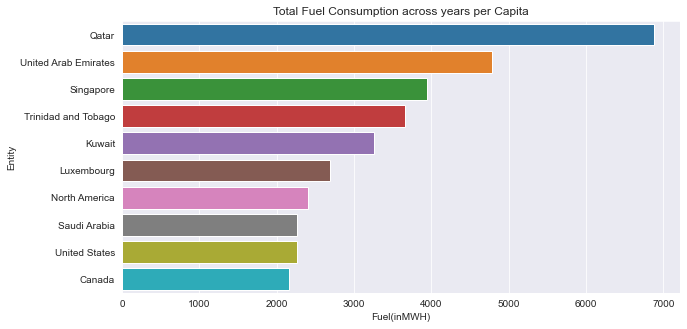

In [32]:
#plotting the top 10 countries
plt.figure(figsize=(10,5))
plt.xlabel("Total Fuel Consumption across years(inKWH)")
plt.title("Total Fuel Consumption across years per Capita")
sns.barplot(x=df_per_capita['Fuel(inMWH)'].head(10),y=df_per_capita['Entity'].head(10))

In [33]:
#getting fossil fuel per capita for Four countries
USA = df[df['Entity']=='United States']
UK  = df[df['Entity']=='United Kingdom']
Australia = df[df['Entity']=='Australia']
Russia = df[df['Entity']=='Russia']

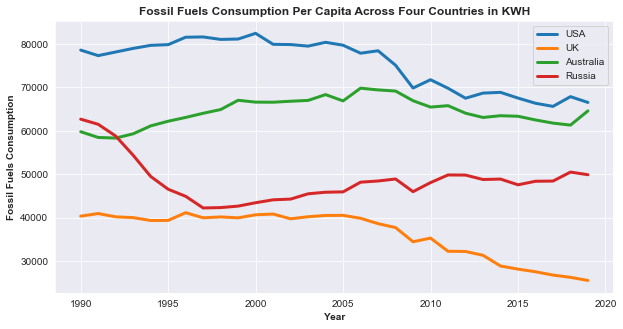

In [34]:
plt.figure(figsize=(10,5))
USAplot = plt.plot(USA['Year'],USA['Fuel(inKWH)'] ,label = 'USA',linewidth=3)
UKplot = plt.plot(UK['Year'],UK['Fuel(inKWH)'], label = 'UK',linewidth=3 )
Ausplot = plt.plot(Australia['Year'],Australia['Fuel(inKWH)'], label = 'Australia',linewidth=3)
RusPlot = plt.plot(Russia['Year'],Russia['Fuel(inKWH)'], label = 'Russia',linewidth=3)
plt.xlabel("Year", fontweight='bold')
plt.title("Fossil Fuels Consumption Per Capita Across Four Countries in KWH",fontweight='bold')
plt.ylabel('Fossil Fuels Consumption',fontweight='bold')
plt.legend()

### Exploring the Total Fossil fuel consumption over years across the world

In [36]:
#getting total fuel consumption(inTWH) 
df1 = pd.read_csv("../data/Fossil_Fuels/fossil-fuel-primary-energy.csv")
df1= df1[df1['Year']>=1990]
df1.head()

,Entity,Code,Year,Fossil Fuels (TWh)
25,Africa,NaN,1990,2422.825537
26,Africa,NaN,1991,2409.136911
27,Africa,NaN,1992,2460.509671
28,Africa,NaN,1993,2478.949529
29,Africa,NaN,1994,2548.241696


In [37]:
df1_world=  df1[df1['Entity']=='World']
df1_world.head()

,Entity,Code,Year,Fossil Fuels (TWh)
4254,World,OWID_WRL,1990,83070.31910
4255,World,OWID_WRL,1991,83310.06375
4256,World,OWID_WRL,1992,83961.13642
4257,World,OWID_WRL,1993,84043.49932
4258,World,OWID_WRL,1994,85101.86879


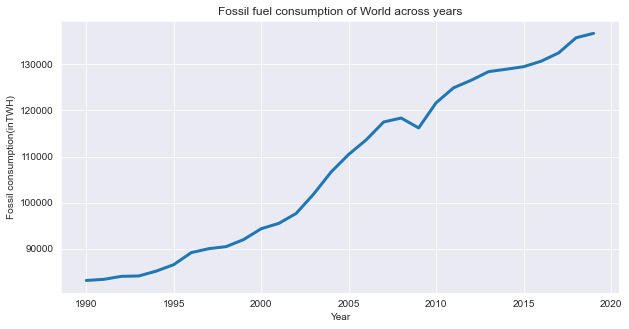

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df1_world['Year'],df1_world['Fossil Fuels (TWh)'],linewidth=3,)
plt.ylabel("Fossil consumption(inTWH)")
plt.xlabel("Year")
plt.title("Fossil fuel consumption of World across years")
plt.show()

In [39]:
#getting fossil fuel consumption for Four countries
USA = df1[df1['Entity']=='United States']
UK  = df1[df1['Entity']=='United Kingdom']
Australia = df1[df1['Entity']=='Australia']
Russia = df1[df1['Entity']=='Russia']

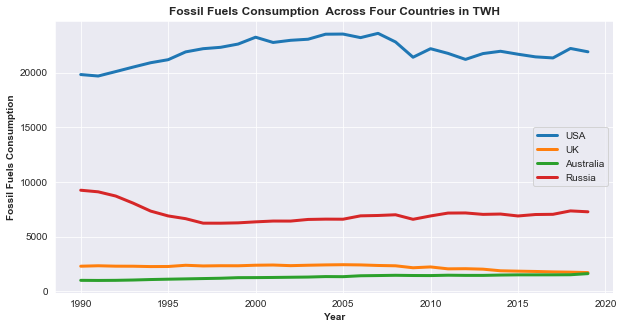

In [40]:
plt.figure(figsize=(10,5))
USAplot = plt.plot(USA['Year'],USA['Fossil Fuels (TWh)'] ,label = 'USA',linewidth=3)
UKplot = plt.plot(UK['Year'],UK['Fossil Fuels (TWh)'], label = 'UK',linewidth=3 )
Ausplot = plt.plot(Australia['Year'],Australia['Fossil Fuels (TWh)'], label = 'Australia',linewidth=3)
RusPlot = plt.plot(Russia['Year'],Russia['Fossil Fuels (TWh)'], label = 'Russia',linewidth=3)
plt.xlabel("Year", fontweight='bold')
plt.title("Fossil Fuels Consumption  Across Four Countries in TWH",fontweight='bold')
plt.ylabel('Fossil Fuels Consumption',fontweight='bold')
plt.legend()